In [1]:
import keras

Using TensorFlow backend.


In [21]:
from keras.backend import set_session
import tensorflow as tf
import os

In [22]:
def create_session(gpu_id='0', pp_mem_frac=None):

    tf.reset_default_graph()
    os.environ["CUDA_VISIBLE_DEVICES"] = gpu_id # can multiple?
    with tf.device('/gpu:' + gpu_id):
        config = tf.ConfigProto()
        config.gpu_options.allow_growth = True
        if pp_mem_frac is not None:
            config.gpu_options.per_process_gpu_memory_fraction=pp_mem_frac
        session = tf.Session(config = config)
    return session
gpu_id = '0'
sess = create_session(gpu_id)
set_session(sess)
print("GPU Finished..............................")

GPU Finished..............................


In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from keras.datasets import mnist

In [25]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import Adam,SGD

In [26]:
(X_train,Y_train), (X_test,Y_test) = mnist.load_data()

In [27]:
x_train = X_train.reshape(60000,28,28,1)/255
x_test = X_test.reshape(10000,28,28,1)/255

In [28]:
#one_hot
y_train = np_utils.to_categorical(Y_train,10) 
y_test = np_utils.to_categorical(Y_test,10)

In [95]:
model = Sequential()

In [96]:
model.add(Conv2D(8,(5,5), padding='same',input_shape = (28,28,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))

In [97]:
model.add(Conv2D(16,(5,5),padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))

In [98]:
model.add(Conv2D(32,(5,5),padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))

In [99]:
model.add(Flatten())

In [100]:
model.add(Dense(20,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [101]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0004), metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 28, 28, 8)         208       
_________________________________________________________________
activation_23 (Activation)   (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 14, 16)        3216      
_________________________________________________________________
activation_24 (Activation)   (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 7, 7, 32)          12832     
__________

In [102]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=2)

In [103]:
history = model.fit(x_train, y_train, batch_size = 100, epochs = 30, verbose = 1,  validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 3s - loss: 0.6147 - acc: 0.8140 - val_loss: 0.1750 - val_acc: 0.9498
Epoch 2/30
54000/54000 [==============================] - 2s - loss: 0.1521 - acc: 0.9560 - val_loss: 0.1082 - val_acc: 0.9713
Epoch 3/30
54000/54000 [==============================] - 2s - loss: 0.1059 - acc: 0.9685 - val_loss: 0.0973 - val_acc: 0.9720
Epoch 4/30
54000/54000 [==============================] - 2s - loss: 0.0841 - acc: 0.9738 - val_loss: 0.0863 - val_acc: 0.97780.97
Epoch 5/30
54000/54000 [==============================] - 2s - loss: 0.0702 - acc: 0.9789 - val_loss: 0.0641 - val_acc: 0.9807
Epoch 6/30
54000/54000 [==============================] - 2s - loss: 0.0599 - acc: 0.9819 - val_loss: 0.0567 - val_acc: 0.9838
Epoch 7/30
54000/54000 [==============================] - 2s - loss: 0.0524 - acc: 0.9841 - val_loss: 0.0551 - val_acc: 0.9842
Epoch 8/30
54000/54000 [==============================] - 

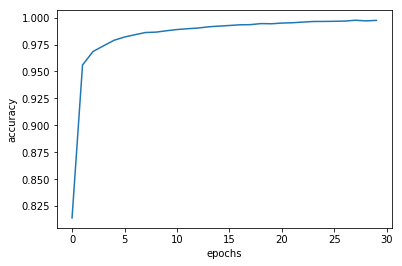

In [104]:
plt.plot(history.history['acc'])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [105]:
from sklearn import metrics 
from sklearn.metrics import classification_report

print("Train data：")
print(classification_report(y_train.argmax(1), model.predict(x_train).argmax(1)))
metrics.accuracy_score(y_train.argmax(1), model.predict(x_train).argmax(1))

Train data：
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      5923
          1       1.00      1.00      1.00      6742
          2       1.00      1.00      1.00      5958
          3       1.00      1.00      1.00      6131
          4       1.00      1.00      1.00      5842
          5       1.00      1.00      1.00      5421
          6       1.00      1.00      1.00      5918
          7       1.00      0.99      1.00      6265
          8       1.00      1.00      1.00      5851
          9       1.00      1.00      1.00      5949

avg / total       1.00      1.00      1.00     60000



0.9980166666666667

In [106]:
print("Test data：")
print(classification_report(y_test.argmax(1), model.predict(x_test).argmax(1)))
metrics.accuracy_score(y_test.argmax(1), model.predict(x_test).argmax(1))

Test data：
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      1.00      0.99      1135
          2       0.99      0.99      0.99      1032
          3       0.99      1.00      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.99      0.99      0.99       892
          6       0.99      0.99      0.99       958
          7       0.99      0.98      0.99      1028
          8       0.99      0.99      0.99       974
          9       0.99      0.98      0.98      1009

avg / total       0.99      0.99      0.99     10000



0.9906